In [1]:
import sys
sys.path.append('/usr/local/lib/wingpro10')
sys.path.append('/home/yeison/Development/PythonDev/DunderLab/python-chaski')
import wingdbstub


wingdbstub.Ensure()

In [2]:
import sys
import time
import asyncio
from datetime import datetime
from chaski.node import ChaskiNode
from itertools import product
import logging 
from names_generator import generate_name
import networkx as nx
import matplotlib.pyplot as plt
import random
from string import ascii_uppercase
# logging.basicConfig(level=logging.DEBUG)

In [3]:
# host = '::1'  # IPV6
host = '127.0.0.1'  # IPV4

topics = list(ascii_uppercase[:3])
nodes = []
i = 0

def graph(nodes):
    G = nx.Graph()        # if message.data['remove_original']:
        # for client in self.client_pairs:
        # self.close_connection(client)
    
    nodes_ = []
    for node in nodes:
        nodes_.append({'name': node.name, 'server_pairs': {v.name:0 for v in node.server_pairs}})
    
    for node in nodes_:
        for neighbor, latency in node["server_pairs"].items():
            G.add_edge(node["name"], neighbor, weight=latency)
    
    # for edge in G.edges(data=True):
    #     print(edge)
    
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
    plt.show()

In [4]:
for sub in ['A', 'B', 'C']:

    print(f'{sub:-^30}')
    
    node = ChaskiNode(host, 65432+i, name=generate_name(), suscriptions=[sub])
    await node.start_udp_server()
    asyncio.create_task(node.start_server())
    

    if len(nodes):
        await node.connect_to_peer(nodes[-1], back_connect=True)
        await node.request_forward(nodes[-1])
        # await asyncio.sleep(1)
        # await node.forward()
        
    await asyncio.sleep(1)
    
    nodes.append(node)
    i = i+1

--------------A---------------


--------------B---------------


--------------C---------------


ERROR:root:ReaderLoop: Error in reader_loop for ('127.0.0.1', 33510): Connection closed by peer


In [5]:
for sub in ['A']:

    print(f'{sub:-^30}')
    
    node = ChaskiNode(host, 65432+i, name=generate_name(), suscriptions=[sub])
    await node.start_udp_server()
    asyncio.create_task(node.start_server())
    

    if len(nodes):
        await node.connect_to_peer(nodes[-1], back_connect=True)
        await node.request_forward(nodes[-1])
        # await asyncio.sleep(1)
        # await node.forward()
        
    await asyncio.sleep(1)
    
    nodes.append(node)
    i = i+1

--------------A---------------


intelligent_shaw: {'A'} [suspicious_varahamihira: {'B'}: 0.651, upbeat_ptolemy: {'A'}: 0.7155]
suspicious_varahamihira: {'B'} [intelligent_shaw: {'A'}: 2.7335, flamboyant_mendel: {'C'}: 2.729]
flamboyant_mendel: {'C'} [suspicious_varahamihira: {'B'}: 2.854, upbeat_ptolemy: {'A'}: 0.456]
upbeat_ptolemy: {'A'} [intelligent_shaw: {'A'}: 0.7324999999999999]


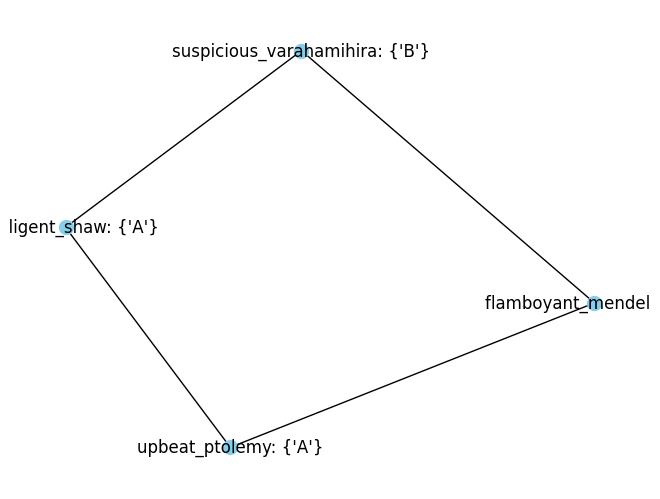

In [8]:
for node in nodes:
    print(node.name, node.server_pairs)

graph(nodes)

intelligent_shaw: {'A'} [: 0, : 0]
suspicious_varahamihira: {'B'} [: 0, : 0]
flamboyant_mendel: {'C'} [: 0]
upbeat_ptolemy: {'A'} [: 0, : 0]


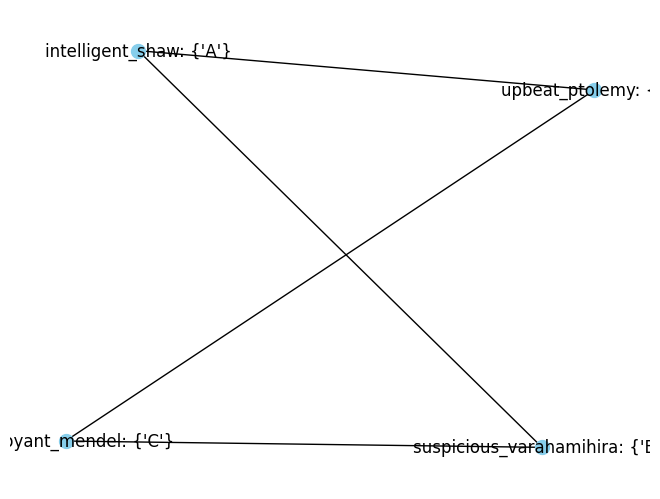

In [9]:
for node in nodes:
    print(node.name, node.client_pairs)

graph(nodes)

In [ ]:
await nodes[-1].close_connection(nodes[-1].server_pairs[0])

In [ ]:
for node in nodes:
    print(node.name, node.server_pairs)

In [ ]:
G = nx.Graph()

nodes_ = []
for node in nodes:
    nodes_.append({'name': node.name, 'server_pairs': {v.name:0 for v in node.server_pairs}})

for node in nodes_:
    for neighbor, latency in node["server_pairs"].items():
        G.add_edge(node["name"], neighbor, weight=latency)

for edge in G.edges(data=True):
    print(edge)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
plt.show()

In [ ]:
for sub in ['A', 'B', 'C', 'A']:

    node = ChaskiNode(host, 65432+i, name=generate_name(), suscriptions=[sub])
    await node.start_udp_server()
    asyncio.create_task(node.start_server())
    
    
    if len(nodes):
        await node.connect_to_peer(nodes[-1], back_connect=False)
        await node.ping()
        # asyncio.create_task(node.graph())
        await node.forward()
    
    nodes.append(node)
    i = i+1
    await asyncio.sleep(1)
    
nodes

In [ ]:
for node in nodes:
    await asyncio.wait_for(node.ping(), 1)

In [ ]:
await nodes[-1].forward()

In [ ]:
await nodes[-1].ping()

In [ ]:
for node in nodes:
    print(node.name, node.server_pairs)

In [ ]:
await nodes[-1].close_connection(nodes[-1].server_pairs[0])

In [ ]:
G = nx.Graph()

nodes_ = []
for node in nodes:
    nodes_.append({'name': node.name, 'server_pairs': {v.name:0 for v in node.server_pairs}})

for node in nodes_:
    for neighbor, latency in node["server_pairs"].items():
        G.add_edge(node["name"], neighbor, weight=latency)

for edge in G.edges(data=True):
    print(edge)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
plt.show()

In [ ]:
from string import ascii_letters


In [ ]:
''.join([random.choice(ascii_letters) for _ in range(32)])